In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gamma
import seaborn as sns


476


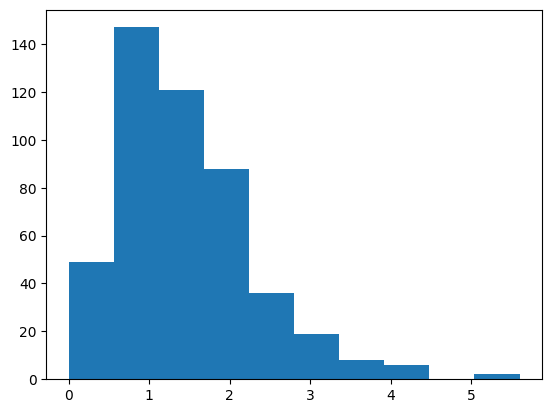

In [6]:
df = pd.read_csv("prem_xg_data.csv")
print(df.size)
plt.hist(df)
plt.show()

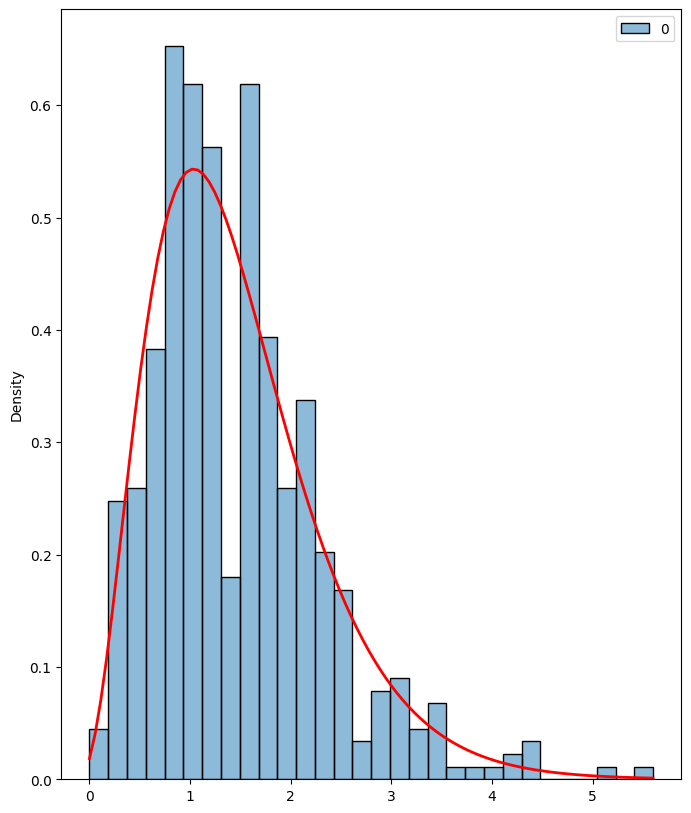

In [10]:
df_array = np.array(df)

alpha_fit, loc, beta = stats.gamma.fit(df_array)

# Histogram with fitted gamma distribution
fig = plt.figure(figsize=(8,10))
sns.histplot(data=df_array, stat='density', bins=30)
x = np.linspace(min(df_array), max(df_array), 100)
plt.plot(x, gamma.pdf(x, alpha_fit, loc, beta),
         'r-', lw=2, label="Fitted Gamma")
plt.show()


In [14]:
# Perform KS test
# We test against a gamma distribution with the fitted parameters
data = df.values.flatten()

ks_statistic, p_value = stats.kstest(data, 'gamma', args=(alpha_fit, loc, beta))

print(f"Kolmogorov-Smirnov test results:")
print(f"KS statistic: {ks_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
print("\nInterpretation:")
print(f"Null hypothesis: Data follows the specified gamma distribution")
if p_value < 0.05:
    print("Since p-value < 0.05, we reject the null hypothesis")
    print("This suggests the data does NOT follow a gamma distribution")
else:
    print("Since p-value >= 0.05, we fail to reject the null hypothesis")
    print("This suggests the data COULD follow a gamma distribution")

Kolmogorov-Smirnov test results:
KS statistic: 0.0466
p-value: 0.2440

Interpretation:
Null hypothesis: Data follows the specified gamma distribution
Since p-value >= 0.05, we fail to reject the null hypothesis
This suggests the data COULD follow a gamma distribution
